## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")

Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model1 = build_mlp()
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,969,930
Trainable params: 1,969,930
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.005)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model1.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.4698 - accuracy: 0.2470 - val_loss: 1.8023 - val_accuracy: 0.3495
Epoch 2/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.7713 - accuracy: 0.3575 - val_loss: 1.7181 - val_accuracy: 0.3788
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6819 - accuracy: 0.3910 - val_loss: 1.6703 - val_accuracy: 0.3916
Epoch 4/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6190 - accuracy: 0.4170 - val_loss: 1.7398 - val_accuracy: 0.3778
Epoch 5/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.5780 - accuracy: 0.4325 - val_loss: 1.7112 - val_accuracy: 0.3980
Epoch 6/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5478 - accuracy: 0.4430 - val_loss: 1.5864 - val_accuracy: 0.4238
Epoch 7/500
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 45us/step - loss: 1.1895 - accuracy: 0.5701 - val_loss: 1.5714 - val_accuracy: 0.4800
Epoch 55/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.1872 - accuracy: 0.5739 - val_loss: 1.6006 - val_accuracy: 0.4803
Epoch 56/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.1762 - accuracy: 0.5757 - val_loss: 1.6141 - val_accuracy: 0.4767
Epoch 57/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1825 - accuracy: 0.5739 - val_loss: 1.6595 - val_accuracy: 0.4509
Epoch 58/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1838 - accuracy: 0.5717 - val_loss: 1.5783 - val_accuracy: 0.4765
Epoch 59/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.1647 - accuracy: 0.5783 - val_loss: 1.6940 - val_accuracy: 0.4662
Epoch 60/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.1680 - accuracy: 0.5771 - val_loss: 

50000/50000 [==============================] - 3s 51us/step - loss: 1.0822 - accuracy: 0.6120 - val_loss: 1.8263 - val_accuracy: 0.4647
Epoch 110/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0628 - accuracy: 0.6178 - val_loss: 1.9456 - val_accuracy: 0.4574
Epoch 111/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.0719 - accuracy: 0.6144 - val_loss: 1.8839 - val_accuracy: 0.4612
Epoch 112/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0661 - accuracy: 0.6164 - val_loss: 1.9080 - val_accuracy: 0.4661
Epoch 113/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0679 - accuracy: 0.6165 - val_loss: 1.8052 - val_accuracy: 0.4618
Epoch 114/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0608 - accuracy: 0.6151 - val_loss: 1.8648 - val_accuracy: 0.4597
Epoch 115/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.0441 - accuracy: 0.6229 - val_

Epoch 164/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9940 - accuracy: 0.6388 - val_loss: 2.0723 - val_accuracy: 0.4637
Epoch 165/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0172 - accuracy: 0.6330 - val_loss: 1.9480 - val_accuracy: 0.4588
Epoch 166/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0150 - accuracy: 0.6355 - val_loss: 2.1975 - val_accuracy: 0.4523
Epoch 167/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9969 - accuracy: 0.6395 - val_loss: 2.0839 - val_accuracy: 0.4703
Epoch 168/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0043 - accuracy: 0.6374 - val_loss: 2.1634 - val_accuracy: 0.4469
Epoch 169/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9954 - accuracy: 0.6431 - val_loss: 2.0372 - val_accuracy: 0.4669
Epoch 170/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.9910 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.9504 - accuracy: 0.6575 - val_loss: 2.3006 - val_accuracy: 0.4480
Epoch 219/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9758 - accuracy: 0.6512 - val_loss: 2.2238 - val_accuracy: 0.4518
Epoch 220/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9664 - accuracy: 0.6522 - val_loss: 2.2460 - val_accuracy: 0.4600
Epoch 221/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9692 - accuracy: 0.6518 - val_loss: 2.2030 - val_accuracy: 0.4677
Epoch 222/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9667 - accuracy: 0.6548 - val_loss: 2.1672 - val_accuracy: 0.4462
Epoch 223/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9787 - accuracy: 0.6491 - val_loss: 2.5025 - val_accuracy: 0.4434
Epoch 224/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9623 - accuracy: 0.6565 - val_

Epoch 273/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9309 - accuracy: 0.6637 - val_loss: 2.4386 - val_accuracy: 0.4554
Epoch 274/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9191 - accuracy: 0.6688 - val_loss: 2.4632 - val_accuracy: 0.4508
Epoch 275/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9554 - accuracy: 0.6594 - val_loss: 2.4137 - val_accuracy: 0.4574
Epoch 276/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9493 - accuracy: 0.6608 - val_loss: 2.3297 - val_accuracy: 0.4573
Epoch 277/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9731 - accuracy: 0.6495 - val_loss: 2.4196 - val_accuracy: 0.4608
Epoch 278/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9598 - accuracy: 0.6575 - val_loss: 2.3973 - val_accuracy: 0.4578
Epoch 279/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9606 - accuracy:

50000/50000 [==============================] - 2s 45us/step - loss: 0.9156 - accuracy: 0.6701 - val_loss: 2.5302 - val_accuracy: 0.4528
Epoch 328/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9642 - accuracy: 0.6584 - val_loss: 2.4996 - val_accuracy: 0.4411
Epoch 329/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9250 - accuracy: 0.6699 - val_loss: 2.6891 - val_accuracy: 0.4516
Epoch 330/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.9245 - accuracy: 0.6694 - val_loss: 2.5882 - val_accuracy: 0.4457
Epoch 331/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9077 - accuracy: 0.6737 - val_loss: 2.6503 - val_accuracy: 0.4541
Epoch 332/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.9361 - accuracy: 0.6651 - val_loss: 2.3946 - val_accuracy: 0.4456
Epoch 333/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9430 - accuracy: 0.6630 - val_

Epoch 382/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.9143 - accuracy: 0.6755 - val_loss: 2.6101 - val_accuracy: 0.4422
Epoch 383/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9721 - accuracy: 0.6570 - val_loss: 2.8244 - val_accuracy: 0.4460
Epoch 384/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9355 - accuracy: 0.6704 - val_loss: 2.6589 - val_accuracy: 0.4487
Epoch 385/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9059 - accuracy: 0.6772 - val_loss: 2.6780 - val_accuracy: 0.4518
Epoch 386/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9100 - accuracy: 0.6740 - val_loss: 2.5255 - val_accuracy: 0.4539
Epoch 387/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9168 - accuracy: 0.6753 - val_loss: 2.8833 - val_accuracy: 0.4520
Epoch 388/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.9290 - accuracy:

50000/50000 [==============================] - 3s 51us/step - loss: 0.9179 - accuracy: 0.6763 - val_loss: 2.8226 - val_accuracy: 0.4429
Epoch 437/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9311 - accuracy: 0.6726 - val_loss: 2.8848 - val_accuracy: 0.4480
Epoch 438/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.9220 - accuracy: 0.6706 - val_loss: 2.8009 - val_accuracy: 0.4461
Epoch 439/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9587 - accuracy: 0.6641 - val_loss: 2.9280 - val_accuracy: 0.4412
Epoch 440/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9213 - accuracy: 0.6722 - val_loss: 2.7168 - val_accuracy: 0.4536
Epoch 441/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8880 - accuracy: 0.6806 - val_loss: 2.7915 - val_accuracy: 0.4537
Epoch 442/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.9121 - accuracy: 0.6759 - val_

Epoch 491/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8919 - accuracy: 0.6840 - val_loss: 3.0923 - val_accuracy: 0.4422
Epoch 492/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8762 - accuracy: 0.6870 - val_loss: 2.9859 - val_accuracy: 0.4454
Epoch 493/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.9368 - accuracy: 0.6692 - val_loss: 2.8703 - val_accuracy: 0.4535
Epoch 494/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8889 - accuracy: 0.6848 - val_loss: 2.9803 - val_accuracy: 0.4426
Epoch 495/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.9163 - accuracy: 0.6786 - val_loss: 3.0999 - val_accuracy: 0.4454
Epoch 496/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8834 - accuracy: 0.6840 - val_loss: 3.1314 - val_accuracy: 0.4474
Epoch 497/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8826 - accuracy:

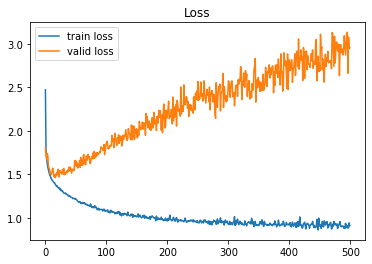

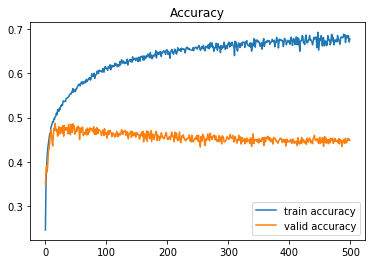

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model1.history.history["loss"]
valid_loss = model1.history.history["val_loss"]

train_acc = model1.history.history["accuracy"]
valid_acc = model1.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
model2 = build_mlp()
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 1,969,930
Trainable params: 1,969,930
Non-trainable params: 0
_________________________________________________________________


In [11]:
"""
Compile 模型
將 Optimizer 換成 SGD
"""
optimizer = keras.optimizers.SGD(lr=0.01)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 50us/step - loss: 2.0716 - accuracy: 0.2666 - val_loss: 1.9399 - val_accuracy: 0.3095
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8829 - accuracy: 0.3382 - val_loss: 1.9169 - val_accuracy: 0.3080
Epoch 3/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.8144 - accuracy: 0.3645 - val_loss: 1.8227 - val_accuracy: 0.3564
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.7684 - accuracy: 0.3800 - val_loss: 1.7412 - val_accuracy: 0.3902
Epoch 5/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.7296 - accuracy: 0.3945 - val_loss: 1.7834 - val_accuracy: 0.3705
Epoch 6/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.7014 - accuracy: 0.4024 - val_loss: 1.6805 - val_accuracy: 0.4128
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1857 - accuracy: 0.5856 - val_loss: 1.4703 - val_accuracy: 0.4780
Epoch 57/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1779 - accuracy: 0.5874 - val_loss: 1.6125 - val_accuracy: 0.4331
Epoch 58/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1751 - accuracy: 0.5891 - val_loss: 1.4155 - val_accuracy: 0.5006
Epoch 59/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1733 - accuracy: 0.5923 - val_loss: 1.3409 - val_accuracy: 0.5207
Epoch 60/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1654 - accuracy: 0.5944 - val_loss: 1.3994 - val_accuracy: 0.5056
Epoch 61/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1574 - accuracy: 0.5943 - val_loss: 1.5794 - val_accuracy: 0.4560
Epoch 62/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1490 - accuracy: 0.5972

Epoch 111/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.8684 - accuracy: 0.6993 - val_loss: 1.4153 - val_accuracy: 0.5215
Epoch 112/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.8690 - accuracy: 0.6975 - val_loss: 1.4374 - val_accuracy: 0.5147
Epoch 113/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.8629 - accuracy: 0.7000 - val_loss: 1.3630 - val_accuracy: 0.5373
Epoch 114/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.8551 - accuracy: 0.7056 - val_loss: 1.4086 - val_accuracy: 0.5237
Epoch 115/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.8465 - accuracy: 0.7078 - val_loss: 1.3811 - val_accuracy: 0.5337
Epoch 116/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.8436 - accuracy: 0.7110 - val_loss: 1.5577 - val_accuracy: 0.4945
Epoch 117/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.8424 - accuracy:

50000/50000 [==============================] - 7s 144us/step - loss: 0.5772 - accuracy: 0.8077 - val_loss: 1.7634 - val_accuracy: 0.5001
Epoch 166/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.5751 - accuracy: 0.8055 - val_loss: 1.4539 - val_accuracy: 0.5489
Epoch 167/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.5658 - accuracy: 0.8109 - val_loss: 1.6717 - val_accuracy: 0.5125
Epoch 168/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5686 - accuracy: 0.8084 - val_loss: 1.6718 - val_accuracy: 0.5212
Epoch 169/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5579 - accuracy: 0.8113 - val_loss: 1.4978 - val_accuracy: 0.5368
Epoch 170/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.5550 - accuracy: 0.8131 - val_loss: 1.7375 - val_accuracy: 0.4859
Epoch 171/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.5617 - accuracy: 0.8153 - va

Epoch 220/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.3137 - accuracy: 0.9048 - val_loss: 2.0818 - val_accuracy: 0.5033
Epoch 221/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.3170 - accuracy: 0.9041 - val_loss: 1.9804 - val_accuracy: 0.5066
Epoch 222/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.3023 - accuracy: 0.9098 - val_loss: 1.8421 - val_accuracy: 0.5327
Epoch 223/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.3240 - accuracy: 0.9045 - val_loss: 1.9810 - val_accuracy: 0.5245
Epoch 224/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.3055 - accuracy: 0.9083 - val_loss: 1.9108 - val_accuracy: 0.5251
Epoch 225/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2801 - accuracy: 0.9176 - val_loss: 1.9147 - val_accuracy: 0.5349
Epoch 226/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2974 - accuracy:

50000/50000 [==============================] - 2s 48us/step - loss: 0.1699 - accuracy: 0.9646 - val_loss: 2.2280 - val_accuracy: 0.4860
Epoch 275/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.1451 - accuracy: 0.9640 - val_loss: 2.1102 - val_accuracy: 0.5443
Epoch 276/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1673 - accuracy: 0.9616 - val_loss: 2.1237 - val_accuracy: 0.5475
Epoch 277/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1526 - accuracy: 0.9659 - val_loss: 2.1294 - val_accuracy: 0.5436
Epoch 278/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0998 - accuracy: 0.9802 - val_loss: 2.1632 - val_accuracy: 0.5469
Epoch 279/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1830 - accuracy: 0.9614 - val_loss: 2.1378 - val_accuracy: 0.5458
Epoch 280/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.2132 - accuracy: 0.9506 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0368 - accuracy: 0.9974 - val_loss: 2.4470 - val_accuracy: 0.5441
Epoch 330/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0358 - accuracy: 0.9974 - val_loss: 2.4048 - val_accuracy: 0.5505
Epoch 331/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0345 - accuracy: 0.9976 - val_loss: 2.4082 - val_accuracy: 0.5495
Epoch 332/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0337 - accuracy: 0.9978 - val_loss: 2.4461 - val_accuracy: 0.5483
Epoch 333/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0321 - accuracy: 0.9982 - val_loss: 2.4528 - val_accuracy: 0.5509
Epoch 334/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0315 - accuracy: 0.9981 - val_loss: 2.4872 - val_accuracy: 0.5462
Epoch 335/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0311 - accuracy:

50000/50000 [==============================] - 2s 37us/step - loss: 0.0134 - accuracy: 0.9997 - val_loss: 2.7340 - val_accuracy: 0.5513
Epoch 384/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0133 - accuracy: 0.9998 - val_loss: 2.7363 - val_accuracy: 0.5529
Epoch 385/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0131 - accuracy: 0.9998 - val_loss: 2.7421 - val_accuracy: 0.5518
Epoch 386/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.0128 - accuracy: 0.9998 - val_loss: 2.7873 - val_accuracy: 0.5469
Epoch 387/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0129 - accuracy: 0.5965 - val_loss: 2.2642 - val_accuracy: 0.4758
Epoch 388/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.6983 - accuracy: 0.7612 - val_loss: 2.2424 - val_accuracy: 0.5057
Epoch 389/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.5128 - accuracy: 0.8227 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0168 - accuracy: 0.9998 - val_loss: 2.7248 - val_accuracy: 0.5479
Epoch 439/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0164 - accuracy: 0.9998 - val_loss: 2.7193 - val_accuracy: 0.5489
Epoch 440/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0161 - accuracy: 0.9999 - val_loss: 2.7380 - val_accuracy: 0.5454
Epoch 441/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0159 - accuracy: 0.9998 - val_loss: 2.7367 - val_accuracy: 0.5479
Epoch 442/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0156 - accuracy: 0.9997 - val_loss: 2.7502 - val_accuracy: 0.5447
Epoch 443/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0154 - accuracy: 0.9998 - val_loss: 2.7495 - val_accuracy: 0.5475
Epoch 444/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0152 - accuracy:

50000/50000 [==============================] - 2s 40us/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.9743 - val_accuracy: 0.5484
Epoch 493/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.9783 - val_accuracy: 0.5507
Epoch 494/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.9828 - val_accuracy: 0.5492
Epoch 495/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.9841 - val_accuracy: 0.5524
Epoch 496/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.9873 - val_accuracy: 0.5480
Epoch 497/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.9949 - val_accuracy: 0.5500
Epoch 498/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0076 - accuracy: 1.0000 - val_

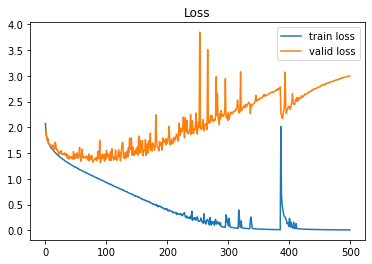

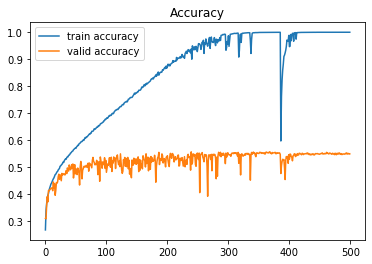

In [13]:
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()